# Web Scraping and Analytics for Playstation and Xbox  Released Games

## Importing the Libraries

In [2]:
import requests # Importing requests to perform a request and response and get the html data from the website
from bs4 import BeautifulSoup # Importing BeautifulSoup to perform html scraping
import pandas as pd # Importing pandas to store the data in a dataframe for further processing 
from tqdm import tqdm  # Import the tqdm to show progress in for for loops

## Web Scraping

### Selecting Playstation and Xbox consoles

The general steps to performing web scraping are:

 1. Define the URL
 2. Request a response from the URL and verify the code
 3. Define the content of the response in a variable (usually 'html')
 4. Define a BeautifulSoup instance
 5. Utilize manual inspection and find_all function to scrap through the data
 6. Create a URL for the scrape process


In [3]:
# URL of the website to scrape
url = "https://www.vgchartz.com/gamedb/games.php"

# Define the response and print it to confirm webage retreival

response = requests.get(url)
print(response.status_code)

200


In [4]:
# Parse the HTML website in preparation to scrape the data

html = response.content
soup = BeautifulSoup(html, 'html.parser')

In [28]:
# This code is searching for a < select > element in the HTML document with the attribute name set to 'console', meaning it's looking for values in the console drop-down menu
# The "console" attribute was found by inspecting the website, below a screenshot:

console_select = soup.find('select', {'name': 'console'})

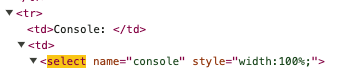

In [36]:
# Here we can see that we have all the values of the consoles in the "console_select" element. 

if console_select:
    # Loop through the option elements
    for option in console_select.find_all('option'):
        # Print the value attribute of each option
        print(option.get_text())

-
3DO Interactive Multiplayer
Acorn Electron
All
Amiga
Amiga CD32
Amstrad CPC
Android
Apple II
Arcade
Atari 2600
Atari 5200
Atari 7800
Atari Jaguar
Atari Lynx
Atari ST
BBC Micro
Browser
CD-i
ColecoVision
Commodore 128
Commodore 64
DSi Ware
Fairchild Channel F
Famicom Disk System
FM Towns
Game Boy
Game Boy Advance
Game Boy Color
GameCube
GameGear
Gizmondo
HTC Vive
Intellivision
iOS
iQue
Linux
Mac OS X
Magnavox Odyssey
Microsoft Windows
MS-DOS
MSX
N-Gage
Neo Geo
Neo Geo X
Nintendo 2DS
Nintendo 3DS
Nintendo 64
Nintendo DS
Nintendo DSi
Nintendo Entertainment System
Nintendo Switch
Nvidia Shield
Oculus Rift
Ouya
PC-FX
PCE
PlayStation
PlayStation 2
PlayStation 3
PlayStation 4
PlayStation 5
PlayStation Network
PlayStation Portable
PlayStation Vita
Playstation VR
Sega 32X
Sega CD
Sega Dreamcast
Sega Genesis
Sega Master System
Sega Saturn
Series
Standard Mobile
Super Famicom
Super Nintendo Entertainment System
TurboGrafx-16
Unknown
Virtual Boy
Virtual Console
Wii
Wii U
WiiWare
Windows Phone
Won

In [41]:
# We need to extract the text and the value pairs for each xbox and playstation options
# I will create a dictionary comrehension to extract the options

if console_select:
    # Create a dictionary comprehension to extract the options starting with 'xbox' or 'playstation'
    console_options = {option.get_text(): [option.get('value'), 1] 
                       for option in console_select.find_all('option') 
                       if option.get('value') and (option.get_text().lower().startswith('xbox') or option.get_text().lower().startswith('playstation'))}

    print(console_options)

{'PlayStation': ['PS', 1], 'PlayStation 2': ['PS2', 1], 'PlayStation 3': ['PS3', 1], 'PlayStation 4': ['PS4', 1], 'PlayStation 5': ['PS5', 1], 'PlayStation Network': ['PSN', 1], 'PlayStation Portable': ['PSP', 1], 'PlayStation Vita': ['PSV', 1], 'Playstation VR': ['PVR', 1], 'Xbox': ['XB', 1], 'Xbox 360': ['X360', 1], 'XBox Live': ['XBL', 1], 'Xbox One': ['XOne', 1], 'Xbox Series': ['XS', 1]}


In [42]:
## Here I am creating a output text that will look like a dictionary
## This way I can just copy the code in the box below to get the console selection I want

print("Desired_Consoles = {")
for key, value in console_options.items():
    print(f'"{key}"'.ljust(40), ':', value,",")

print("}")

Desired_Consoles = {
"PlayStation"                            : ['PS', 1] ,
"PlayStation 2"                          : ['PS2', 1] ,
"PlayStation 3"                          : ['PS3', 1] ,
"PlayStation 4"                          : ['PS4', 1] ,
"PlayStation 5"                          : ['PS5', 1] ,
"PlayStation Network"                    : ['PSN', 1] ,
"PlayStation Portable"                   : ['PSP', 1] ,
"PlayStation Vita"                       : ['PSV', 1] ,
"Playstation VR"                         : ['PVR', 1] ,
"Xbox"                                   : ['XB', 1] ,
"Xbox 360"                               : ['X360', 1] ,
"XBox Live"                              : ['XBL', 1] ,
"Xbox One"                               : ['XOne', 1] ,
"Xbox Series"                            : ['XS', 1] ,
}


### Defining Scrape Parameters